In [13]:
# https://github.com/laszewsk/mlcommons/commit/5ea94e88e1fc9ba58f994fb3425ab3594b76f92c
# all experiments done with
# mlcommons/benchmarks/earthquake/mar2022/FFFFWNPFEARTHQ_newTFTv29-gregor.ipynb
# tagged with version 1.0

/home/green/ENV3/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


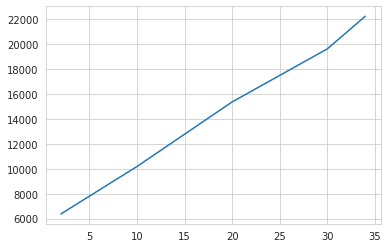

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

x = [2, 10, 20, 30, 34]
y = [6380, 10185, 15360, 19613, 22233]

sns.lineplot(x, y)
plt.show()

In [15]:
def predict_time(x,y, x_pred):
    # x_pred = [0, 2,10,20, 30, 40,50,60, 66]
    import numpy as np
    from sklearn.linear_model import LinearRegression
    x_real = np.array(x).reshape((-1, 1))
    y_real = np.array(y)
    model = LinearRegression()
    model.fit(x_real, y_real)

    r_sq = model.score(x_real, y_real)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)

    x_pred_r = np.array(x_pred).reshape((-1, 1))

    y_pred = model.predict(x_pred_r)

    y_pred = [round(x) for x in y_pred]

    print('predicted response:', y_pred, sep='\n')

    return y_pred


In [16]:
x_pred = [0, 2,10,20, 30, 40,50,60, 66]
y_pred = predict_time(x,y, x_pred)

coefficient of determination: 0.9983134242654341
intercept: 5386.732142857143
slope: [487.88895089]
predicted response:
[5387, 6363, 10266, 15145, 20023, 24902, 29781, 34660, 37587]


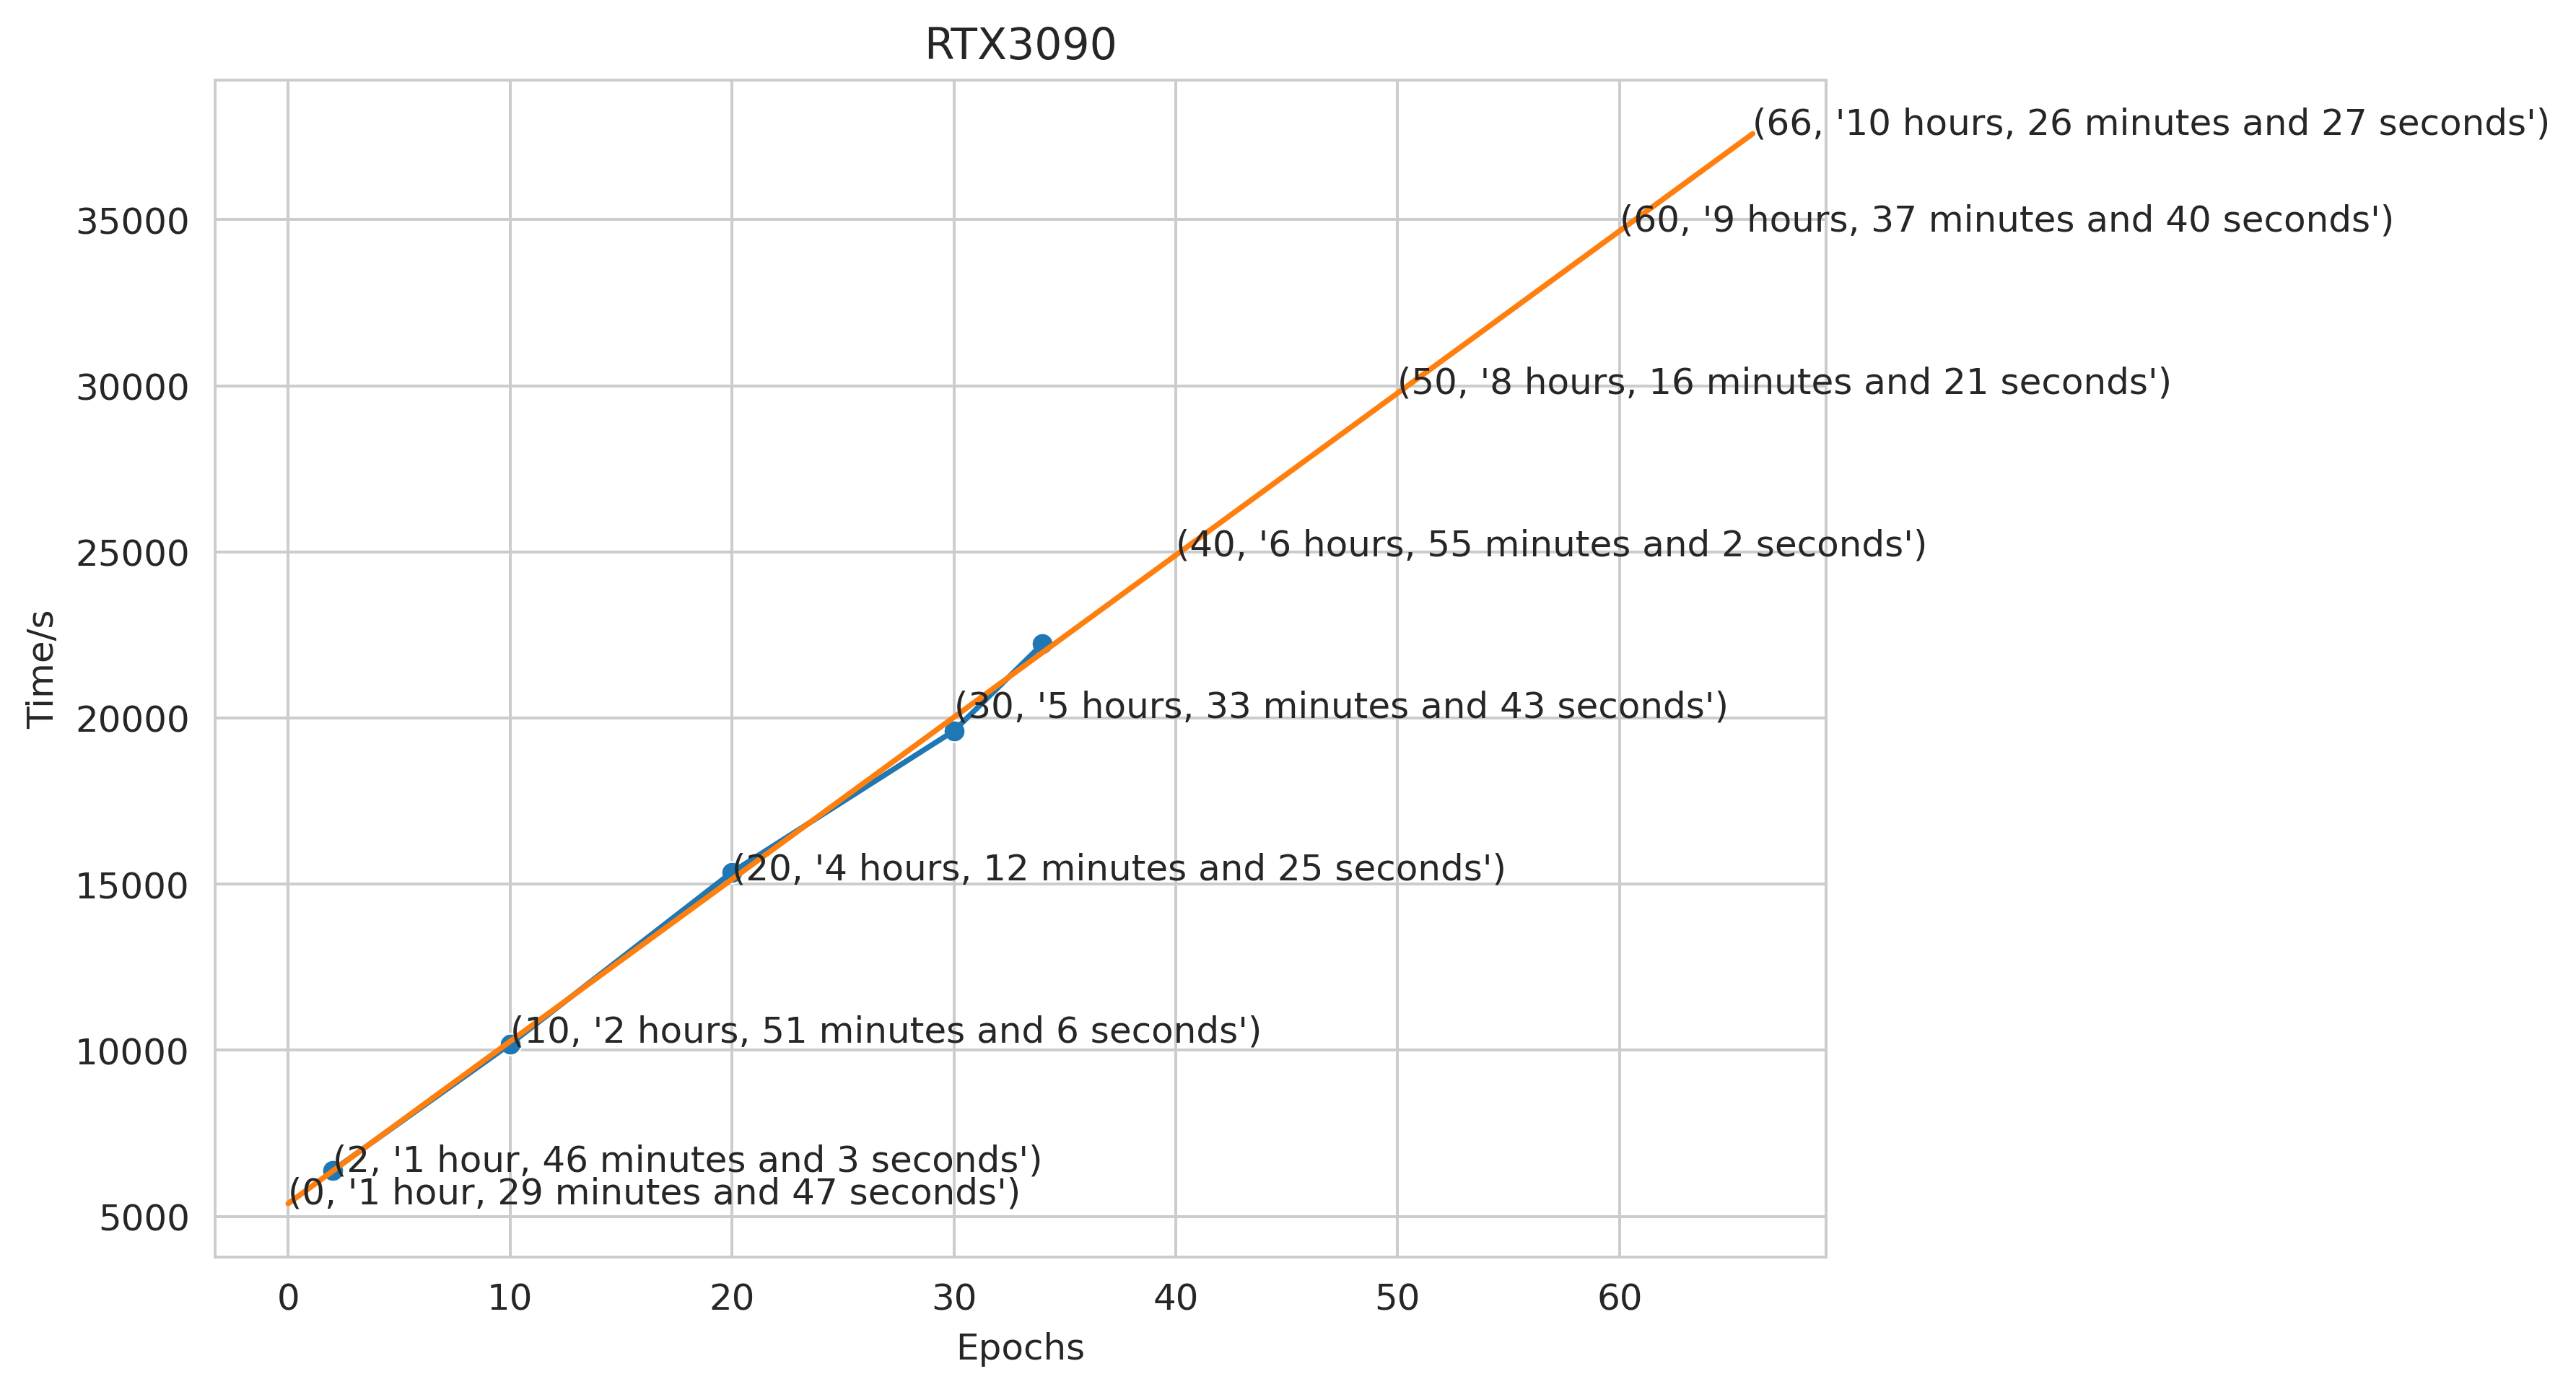

In [17]:
from matplotlib.pyplot import figure
import humanize
figure(figsize=(8, 6), dpi=360)

import matplotlib.pyplot as plt
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=y)
sns.lineplot(x=x_pred, y=y_pred)
plt.xlabel("Epochs")
plt.ylabel("Time/s")
plt.title("RTX3090")
for i in range(len(x_pred)):
    value = humanize.precisedelta(y_pred[i])
    plt.annotate(f"{x_pred[i], value}", (x_pred[i], y_pred[i]))

plt.axvline(33, min(y), max(y))
plt.show()

x_rtx3090 = x
y_rtx3090 = y

In [18]:
import pandas as pd
import io

In [19]:
epoch2 = \
"""
| Timer                        | Status  | K80(r)    | V100(r)    | A100(r)  | RTX3090(G) | RTX3080(R) | T1(?)   | V100(L) |
| total                        |  ok     |  28343.3  |   20295    |  17574.8 |   6589.41  |    8348.49 | 17580.4 | 19697.1 |
| legal sampling location      |  ok     |   1779.63 |   1546.38  |  1226.95 |   457.886  |    532.535 | 1228.35 | 1229.91 |
| RunTFTCustomVersion tft only |  ok     |     0.001 |     0.001  |    0.001 |       0    |        0   | 0.001   | 0.001   |
| RunTFTCustomVersion init     |  ok     |     5.327 |     5.624  |    8.078 |      0.84  |     3.612  | 4.163   | 3.548   |
| RunTFTCustomVersion train    |  ok     |   6967.26 |    1671.35 |  1373.01 |   1103.15  |    2068.9  | 1342.07 | 1608.61 |
| RunTFTCustomVersion bestfit  |  ok     |   17037.6 |    14795.1 |  13022.1 |   4420.31  |    4997.13 | 13018.4 | 14303.7 |
| label2                       |  ok     |     0.002 |      0.002 |    0.002 |      0.001 |      0.001 | 0.002   | 0.002   |
| label3                       |  ok     |     0.108 |     0.096  |    0.099 |     0.033  |      0.036 | 0.1     | 0.01    |
""".strip().replace("\n", ";")
epoch2 = " ".join(epoch2.split()).replace("| ", "|").replace(" |", "|").replace(";", "\n")
print (epoch2)
df = pd.read_table(io.StringIO(epoch2),delimiter='|')

df.drop(df.columns[[0]], axis = 1, inplace = True)  # drop unnamed column
df.drop(df.columns[[1]], axis = 1, inplace = True)  # drop Status
df = df.iloc[: , :-1] # drop Last column
df = df.set_index('Timer')
df

|Timer|Status|K80(r)|V100(r)|A100(r)|RTX3090(G)|RTX3080(R)|T1(?)|V100(L)|
|total|ok|28343.3|20295|17574.8|6589.41|8348.49|17580.4|19697.1|
|legal sampling location|ok|1779.63|1546.38|1226.95|457.886|532.535|1228.35|1229.91|
|RunTFTCustomVersion tft only|ok|0.001|0.001|0.001|0|0|0.001|0.001|
|RunTFTCustomVersion init|ok|5.327|5.624|8.078|0.84|3.612|4.163|3.548|
|RunTFTCustomVersion train|ok|6967.26|1671.35|1373.01|1103.15|2068.9|1342.07|1608.61|
|RunTFTCustomVersion bestfit|ok|17037.6|14795.1|13022.1|4420.31|4997.13|13018.4|14303.7|
|label2|ok|0.002|0.002|0.002|0.001|0.001|0.002|0.002|
|label3|ok|0.108|0.096|0.099|0.033|0.036|0.1|0.01|


,K80(r),V100(r),A100(r),RTX3090(G),RTX3080(R),T1(?),V100(L)
Timer,,,,,,,
total,28343.300,20295.000,17574.800,6589.410,8348.490,17580.400,19697.100
legal sampling location,1779.630,1546.380,1226.950,457.886,532.535,1228.350,1229.910
RunTFTCustomVersion tft only,0.001,0.001,0.001,0.000,0.000,0.001,0.001
RunTFTCustomVersion init,5.327,5.624,8.078,0.840,3.612,4.163,3.548
RunTFTCustomVersion train,6967.260,1671.350,1373.010,1103.150,2068.900,1342.070,1608.610
RunTFTCustomVersion bestfit,17037.600,14795.100,13022.100,4420.310,4997.130,13018.400,14303.700
label2,0.002,0.002,0.002,0.001,0.001,0.002,0.002
label3,0.108,0.096,0.099,0.033,0.036,0.100,0.010


In [20]:
#result_colab = df.loc[["total"]].transpose()
#result_colab
epoch_2 = pd.DataFrame(df)
epoch_2

,K80(r),V100(r),A100(r),RTX3090(G),RTX3080(R),T1(?),V100(L)
Timer,,,,,,,
total,28343.300,20295.000,17574.800,6589.410,8348.490,17580.400,19697.100
legal sampling location,1779.630,1546.380,1226.950,457.886,532.535,1228.350,1229.910
RunTFTCustomVersion tft only,0.001,0.001,0.001,0.000,0.000,0.001,0.001
RunTFTCustomVersion init,5.327,5.624,8.078,0.840,3.612,4.163,3.548
RunTFTCustomVersion train,6967.260,1671.350,1373.010,1103.150,2068.900,1342.070,1608.610
RunTFTCustomVersion bestfit,17037.600,14795.100,13022.100,4420.310,4997.130,13018.400,14303.700
label2,0.002,0.002,0.002,0.001,0.001,0.002,0.002
label3,0.108,0.096,0.099,0.033,0.036,0.100,0.010


In [21]:
def read_cm_csv_benchmark(content, deliminter=",", label=None):
    _content = content.strip().replace("# csv,", "")
    df = pd.read_table(io.StringIO(_content),delimiter=',')
    df.drop(df.columns[[1]], axis = 1, inplace = True)  # drop Status
    if label:
        df.columns.values[1] = label
    return df

In [22]:

# dont know what this is
thomas_1 = read_cm_csv_benchmark("""
# csv,timer,status,time
# csv,total,ok,17580.414
# csv,data head setup,failed,None
# csv,legal sampling location,ok,1228.345
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,failed,None
# csv,RunTFTCustomVersion init,ok,4.163
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,1342.073
# csv,RunTFTCustomVersion bestfit,ok,13018.363
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.1
# csv,RunTFTCustomVersion stop,failed,None
""", label="thomas_1")
thomas_1


,timer,thomas_1
0,total,17580.414
1,data head setup,None
2,legal sampling location,1228.345
3,RunTFTCustomVersion tft only,0.001
4,RunTFTCustomVersion print,None
5,RunTFTCustomVersion init,4.163
6,RunTFTCustomVersion restore,0.0
7,RunTFTCustomVersion analysis,0.0
8,RunTFTCustomVersion train,1342.073
9,RunTFTCustomVersion bestfit,13018.363


In [23]:
# colab P100
colab = {}

colab["40"] = \
"""
# csv,timer,status,time
# csv,total,ok,65791.932
# csv,data head setup,ok,2478.995
# csv,legal sampling location,ok,1229.914
# csv,RunTFTCustomVersion tft only,ok,0.0
# csv,RunTFTCustomVersion print,ok,0.735
# csv,RunTFTCustomVersion A,ok,62897.312
# csv,RunTFTCustomVersion init,ok,3.923
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,49880.256
# csv,RunTFTCustomVersion bestfit,ok,13013.03
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.002
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.493
# csv,RunTFTCustomVersion bestfit summary,ok,0.072
# csv,RunTFTCustomVersion bestfit network summary,ok,0.381
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.044
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.039
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.121
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.036
# csv,RunTFTCustomVersion bestfit finalize,ok,13010.779
# csv,label1,ok,0.0
# csv,label2,ok,0.003
# csv,label3,ok,0.076
"""

colab["20"] = \
"""
# csv,timer,status,time
# csv,total,ok,35726.344
# csv,data head setup,ok,1697.409
# csv,legal sampling location,ok,849.307
# csv,RunTFTCustomVersion tft only,ok,0.0
# csv,RunTFTCustomVersion print,ok,0.528
# csv,RunTFTCustomVersion A,ok,33707.727
# csv,RunTFTCustomVersion init,ok,1.526
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,24543.595
# csv,RunTFTCustomVersion bestfit,ok,9162.509
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.002
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.133
# csv,RunTFTCustomVersion bestfit summary,ok,0.064
# csv,RunTFTCustomVersion bestfit network summary,ok,0.299
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.027
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.023
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.078
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.024
# csv,RunTFTCustomVersion bestfit finalize,ok,9160.819
# csv,label1,ok,0.0
# csv,label2,ok,0.001
# csv,label3,ok,0.059
"""

colab["2"] = \
"""
# csv,timer,status,time
# csv,total,ok,13654.088
# csv,data head setup,ok,1642.207
# csv,legal sampling location,ok,823.203
# csv,RunTFTCustomVersion tft only,ok,0.0
# csv,RunTFTCustomVersion print,ok,0.566
# csv,RunTFTCustomVersion A,ok,11668.538
# csv,RunTFTCustomVersion init,ok,3.207
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,2538.811
# csv,RunTFTCustomVersion bestfit,ok,9126.446
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.002
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.542
# csv,RunTFTCustomVersion bestfit summary,ok,0.059
# csv,RunTFTCustomVersion bestfit network summary,ok,0.275
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.023
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.029
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.078
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.031
# csv,RunTFTCustomVersion bestfit finalize,ok,9124.368
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.062
"""

In [24]:
r_localscratch = {}
r_localscratch["2"] = \
"""
# csv,timer,status,time
# csv,total,ok,18709.772
# csv,data head setup,ok,2913.749
# csv,legal sampling location,ok,1464.395
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.336
# csv,RunTFTCustomVersion A,ok,15100.473
# csv,RunTFTCustomVersion init,ok,3.01
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,1542.911
# csv,RunTFTCustomVersion bestfit,ok,13554.5
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.398
# csv,RunTFTCustomVersion bestfit summary,ok,0.094
# csv,RunTFTCustomVersion bestfit network summary,ok,0.207
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.04
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,13552.698
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.094
"""
r_localscratch["20"] = \
"""
# csv,timer,status,time
# csv,total,ok,32132.45
# csv,data head setup,ok,2951.98
# csv,legal sampling location,ok,1484.189
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.339
# csv,RunTFTCustomVersion A,ok,28478.429
# csv,RunTFTCustomVersion init,ok,2.97
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,14810.563
# csv,RunTFTCustomVersion bestfit,ok,13664.845
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,2.032
# csv,RunTFTCustomVersion bestfit summary,ok,0.094
# csv,RunTFTCustomVersion bestfit network summary,ok,0.205
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.04
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,13662.411
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.089
"""
r_localscratch["30"] = \
"""
# csv,timer,status,time
# csv,total,ok,38942.333
# csv,data head setup,ok,2880.771
# csv,legal sampling location,ok,1449.875
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.336
# csv,RunTFTCustomVersion A,ok,35376.26
# csv,RunTFTCustomVersion init,ok,3.029
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,21934.63
# csv,RunTFTCustomVersion bestfit,ok,13438.534
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.384
# csv,RunTFTCustomVersion bestfit summary,ok,0.094
# csv,RunTFTCustomVersion bestfit network summary,ok,0.202
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.041
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,13436.75
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.094
"""
r_localscratch["40"] = \
"""

# csv,timer,status,time
# csv,total,ok,47834.611
# csv,data head setup,ok,2998.937
# csv,legal sampling location,ok,1502.954
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.347
# csv,RunTFTCustomVersion A,ok,44103.12
# csv,RunTFTCustomVersion init,ok,2.931
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,30267.598
# csv,RunTFTCustomVersion bestfit,ok,13832.522
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,2.048
# csv,RunTFTCustomVersion bestfit summary,ok,0.094
# csv,RunTFTCustomVersion bestfit network summary,ok,0.208
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.041
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,13830.066
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.093
"""

In [56]:
r_project = {}

r_project["2"] = \
"""
# csv,timer,status,time
# csv,total,ok,16987.687
# csv,data head setup,ok,2431.984
# csv,legal sampling location,ok,1225.086
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.43
# csv,RunTFTCustomVersion A,ok,13839.855
# csv,RunTFTCustomVersion init,ok,3.643
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,1334.243
# csv,RunTFTCustomVersion bestfit,ok,12501.838
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,8.016
# csv,RunTFTCustomVersion bestfit summary,ok,0.074
# csv,RunTFTCustomVersion bestfit network summary,ok,0.16
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.031
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.011
# csv,RunTFTCustomVersion bestfit finalize,ok,12493.506
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.1
"""
r_project["20"] = \
"""
# csv,timer,status,time
# csv,total,ok,28335.367
# csv,data head setup,ok,2413.349
# csv,legal sampling location,ok,1218.449
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.327
# csv,RunTFTCustomVersion A,ok,25197.426
# csv,RunTFTCustomVersion init,ok,3.046
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,12725.962
# csv,RunTFTCustomVersion bestfit,ok,12468.321
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,6.748
# csv,RunTFTCustomVersion bestfit summary,ok,0.074
# csv,RunTFTCustomVersion bestfit network summary,ok,0.161
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.032
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.011
# csv,RunTFTCustomVersion bestfit finalize,ok,12461.254
# csv,label1,ok,0.0
# csv,label2,ok,0.001
# csv,label3,ok,0.1
"""
r_project["30"] = \
"""
# csv,timer,status,time
# csv,total,ok,34740.246
# csv,data head setup,ok,2410.69
# csv,legal sampling location,ok,1213.391
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.331
# csv,RunTFTCustomVersion A,ok,31617.488
# csv,RunTFTCustomVersion init,ok,3.041
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,19057.935
# csv,RunTFTCustomVersion bestfit,ok,12556.414
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,9.767
# csv,RunTFTCustomVersion bestfit summary,ok,0.074
# csv,RunTFTCustomVersion bestfit network summary,ok,0.161
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.032
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.012
# csv,RunTFTCustomVersion bestfit finalize,ok,12546.33
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.099
"""
r_project["40"] = \
"""
# csv,timer,status,time
# csv,total,ok,41027.012
# csv,data head setup,ok,2408.132
# csv,legal sampling location,ok,1212.546
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.348
# csv,RunTFTCustomVersion A,ok,37893.247
# csv,RunTFTCustomVersion init,ok,3.021
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,25364.635
# csv,RunTFTCustomVersion bestfit,ok,12525.493
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.185
# csv,RunTFTCustomVersion bestfit summary,ok,0.074
# csv,RunTFTCustomVersion bestfit network summary,ok,0.159
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.031
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.011
# csv,RunTFTCustomVersion bestfit finalize,ok,12523.992
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.1
"""

In [57]:
def create_table(data, label="colab_P100", gpu="P100"):
    df = pd.DataFrame()
    for key in sorted(data.keys()):
        print(key)
        entry = read_cm_csv_benchmark(data[key], label=f"{label}_{key}")
        entry.loc[len(entry.index)] = ['epoch', key]
        entry.loc[len(entry.index)] = ['gpu', gpu]
        df = pd.concat([df,entry], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    df = df.set_index('timer')

    df_data = pd.DataFrame(df)
    return df_data

df_colab = create_table(colab)
df_colab


2
20
40


,colab_P100_2,colab_P100_20,colab_P100_40
timer,,,
total,13654.088,35726.344,65791.932
data head setup,1642.207,1697.409,2478.995
legal sampling location,823.203,849.307,1229.914
RunTFTCustomVersion tft only,0.0,0.0,0.0
RunTFTCustomVersion print,0.566,0.528,0.735
RunTFTCustomVersion A,11668.538,33707.727,62897.312
RunTFTCustomVersion init,3.207,1.526,3.923
RunTFTCustomVersion restore,0.0,0.0,0.0
RunTFTCustomVersion analysis,0.0,0.0,0.0


In [61]:
df_project = create_table(r_project, label="A100_project", gpu="A100")
df_project


2
20
30
40


,A100_project_2,A100_project_20,A100_project_30,A100_project_40
timer,,,,
total,16987.687,28335.367,34740.246,41027.012
data head setup,2431.984,2413.349,2410.69,2408.132
legal sampling location,1225.086,1218.449,1213.391,1212.546
RunTFTCustomVersion tft only,0.001,0.001,0.001,0.001
RunTFTCustomVersion print,0.43,0.327,0.331,0.348
RunTFTCustomVersion A,13839.855,25197.426,31617.488,37893.247
RunTFTCustomVersion init,3.643,3.046,3.041,3.021
RunTFTCustomVersion restore,0.0,0.0,0.0,0.0
RunTFTCustomVersion analysis,0.0,0.0,0.0,0.0


In [62]:
df_local = create_table(r_localscratch, label="A100_local", gpu="A100")
df_local


2
20
30
40


,A100_local_2,A100_local_20,A100_local_30,A100_local_40
timer,,,,
total,18709.772,32132.45,38942.333,47834.611
data head setup,2913.749,2951.98,2880.771,2998.937
legal sampling location,1464.395,1484.189,1449.875,1502.954
RunTFTCustomVersion tft only,0.001,0.001,0.001,0.001
RunTFTCustomVersion print,0.336,0.339,0.336,0.347
RunTFTCustomVersion A,15100.473,28478.429,35376.26,44103.12
RunTFTCustomVersion init,3.01,2.97,3.029,2.931
RunTFTCustomVersion restore,0.0,0.0,0.0,0.0
RunTFTCustomVersion analysis,0.0,0.0,0.0,0.0


In [63]:
def select_epoch_total(df):
    a = df.loc[['total','epoch'],:].transpose()
    a = a.astype({"epoch": int})
    print (a["epoch"])
    x = a["epoch"].values
    y = a["total"].values

    print(x)
    print(y)
    return x, y

In [64]:
x, y = select_epoch_total(df)
x_a100_local, y_a100_local = select_epoch_total(df_local)
x_a100_project, y_a100_project = select_epoch_total(df_project)


colab_P100_2      2
colab_P100_20    20
colab_P100_40    40
Name: epoch, dtype: int64
[ 2 20 40]
[13654.088 35726.344 65791.932]
A100_local_2      2
A100_local_20    20
A100_local_30    30
A100_local_40    40
Name: epoch, dtype: int64
[ 2 20 30 40]
[18709.772 32132.45 38942.333 47834.611]
A100_project_2      2
A100_project_20    20
A100_project_30    30
A100_project_40    40
Name: epoch, dtype: int64
[ 2 20 30 40]
[16987.687 28335.367 34740.246 41027.012]


coefficient of determination: 0.9966505426442948
intercept: 9985.079623616231
slope: [1374.46976015]
predicted response:
[9985, 12734, 23730, 37474, 51219, 64964, 78709, 92453, 100700]


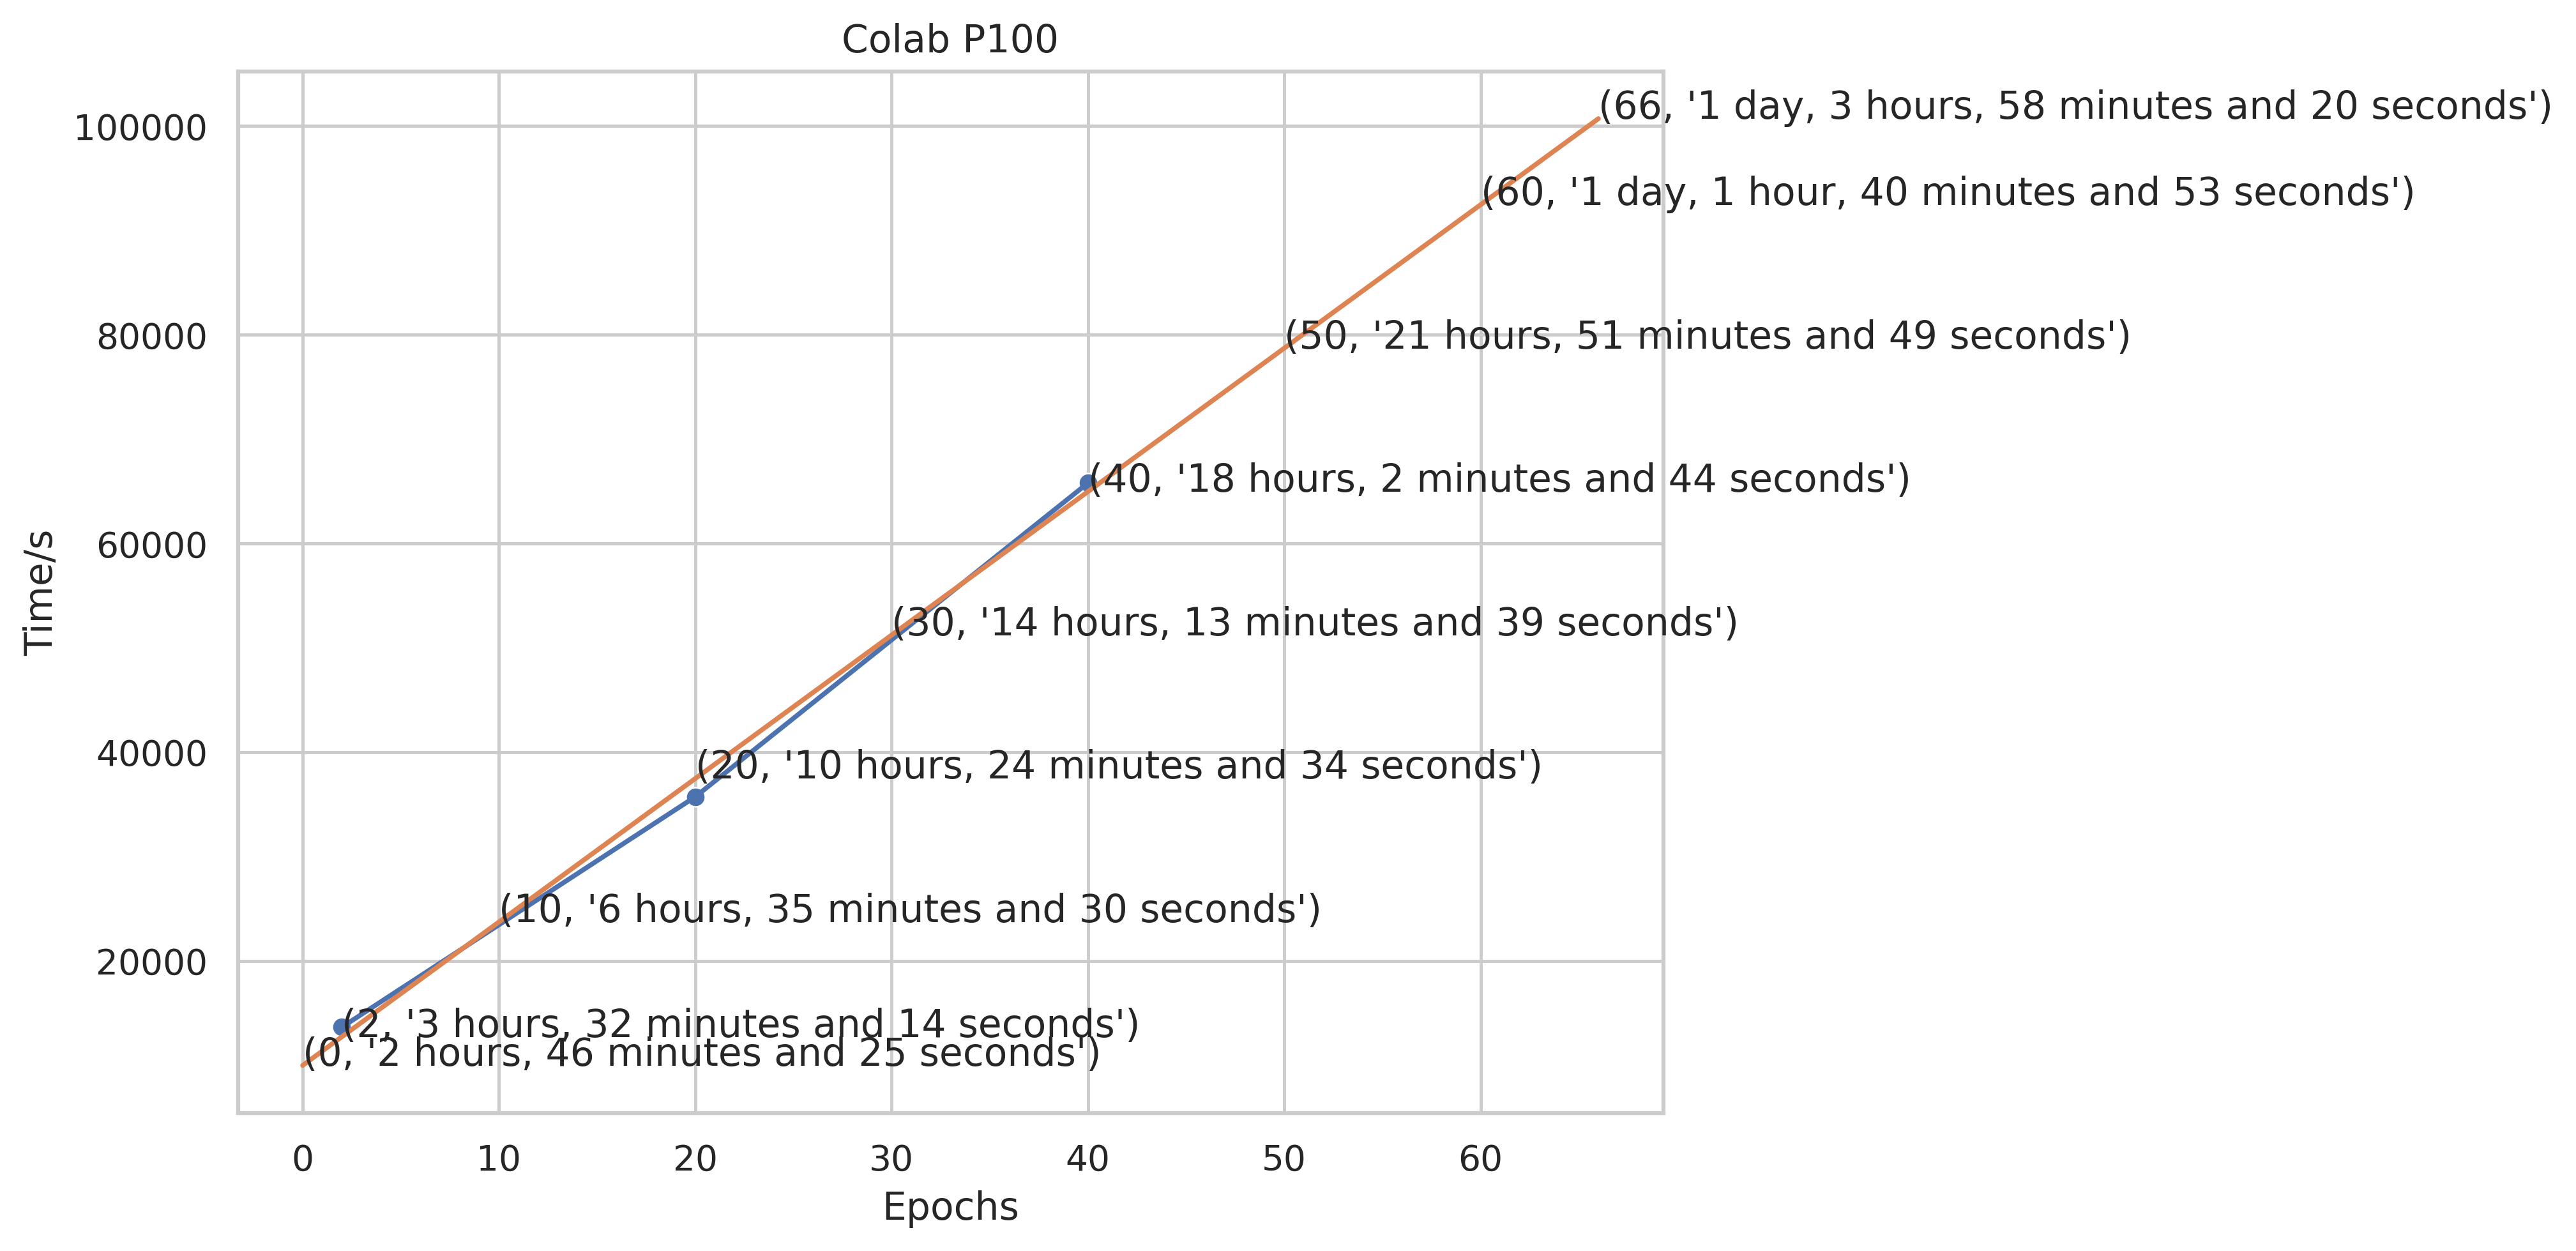

In [65]:
x_pred = [0, 2, 10, 20, 30, 40, 50, 60, 66]
y_pred = predict_time(x, y, x_pred)

figure(figsize=(8, 6), dpi=360)

import matplotlib.pyplot as plt

sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=y)
sns.lineplot(x=x_pred, y=y_pred)
plt.xlabel("Epochs")
plt.ylabel("Time/s")
plt.title("Colab P100")
for i in range(len(x_pred)):
    value = humanize.precisedelta(y_pred[i])
    plt.annotate(f"{x_pred[i], value}", (x_pred[i], y_pred[i]))

plt.axvline(33, min(y), max(y))
plt.show()

x_p100_colab = x
y_p100_colab = y



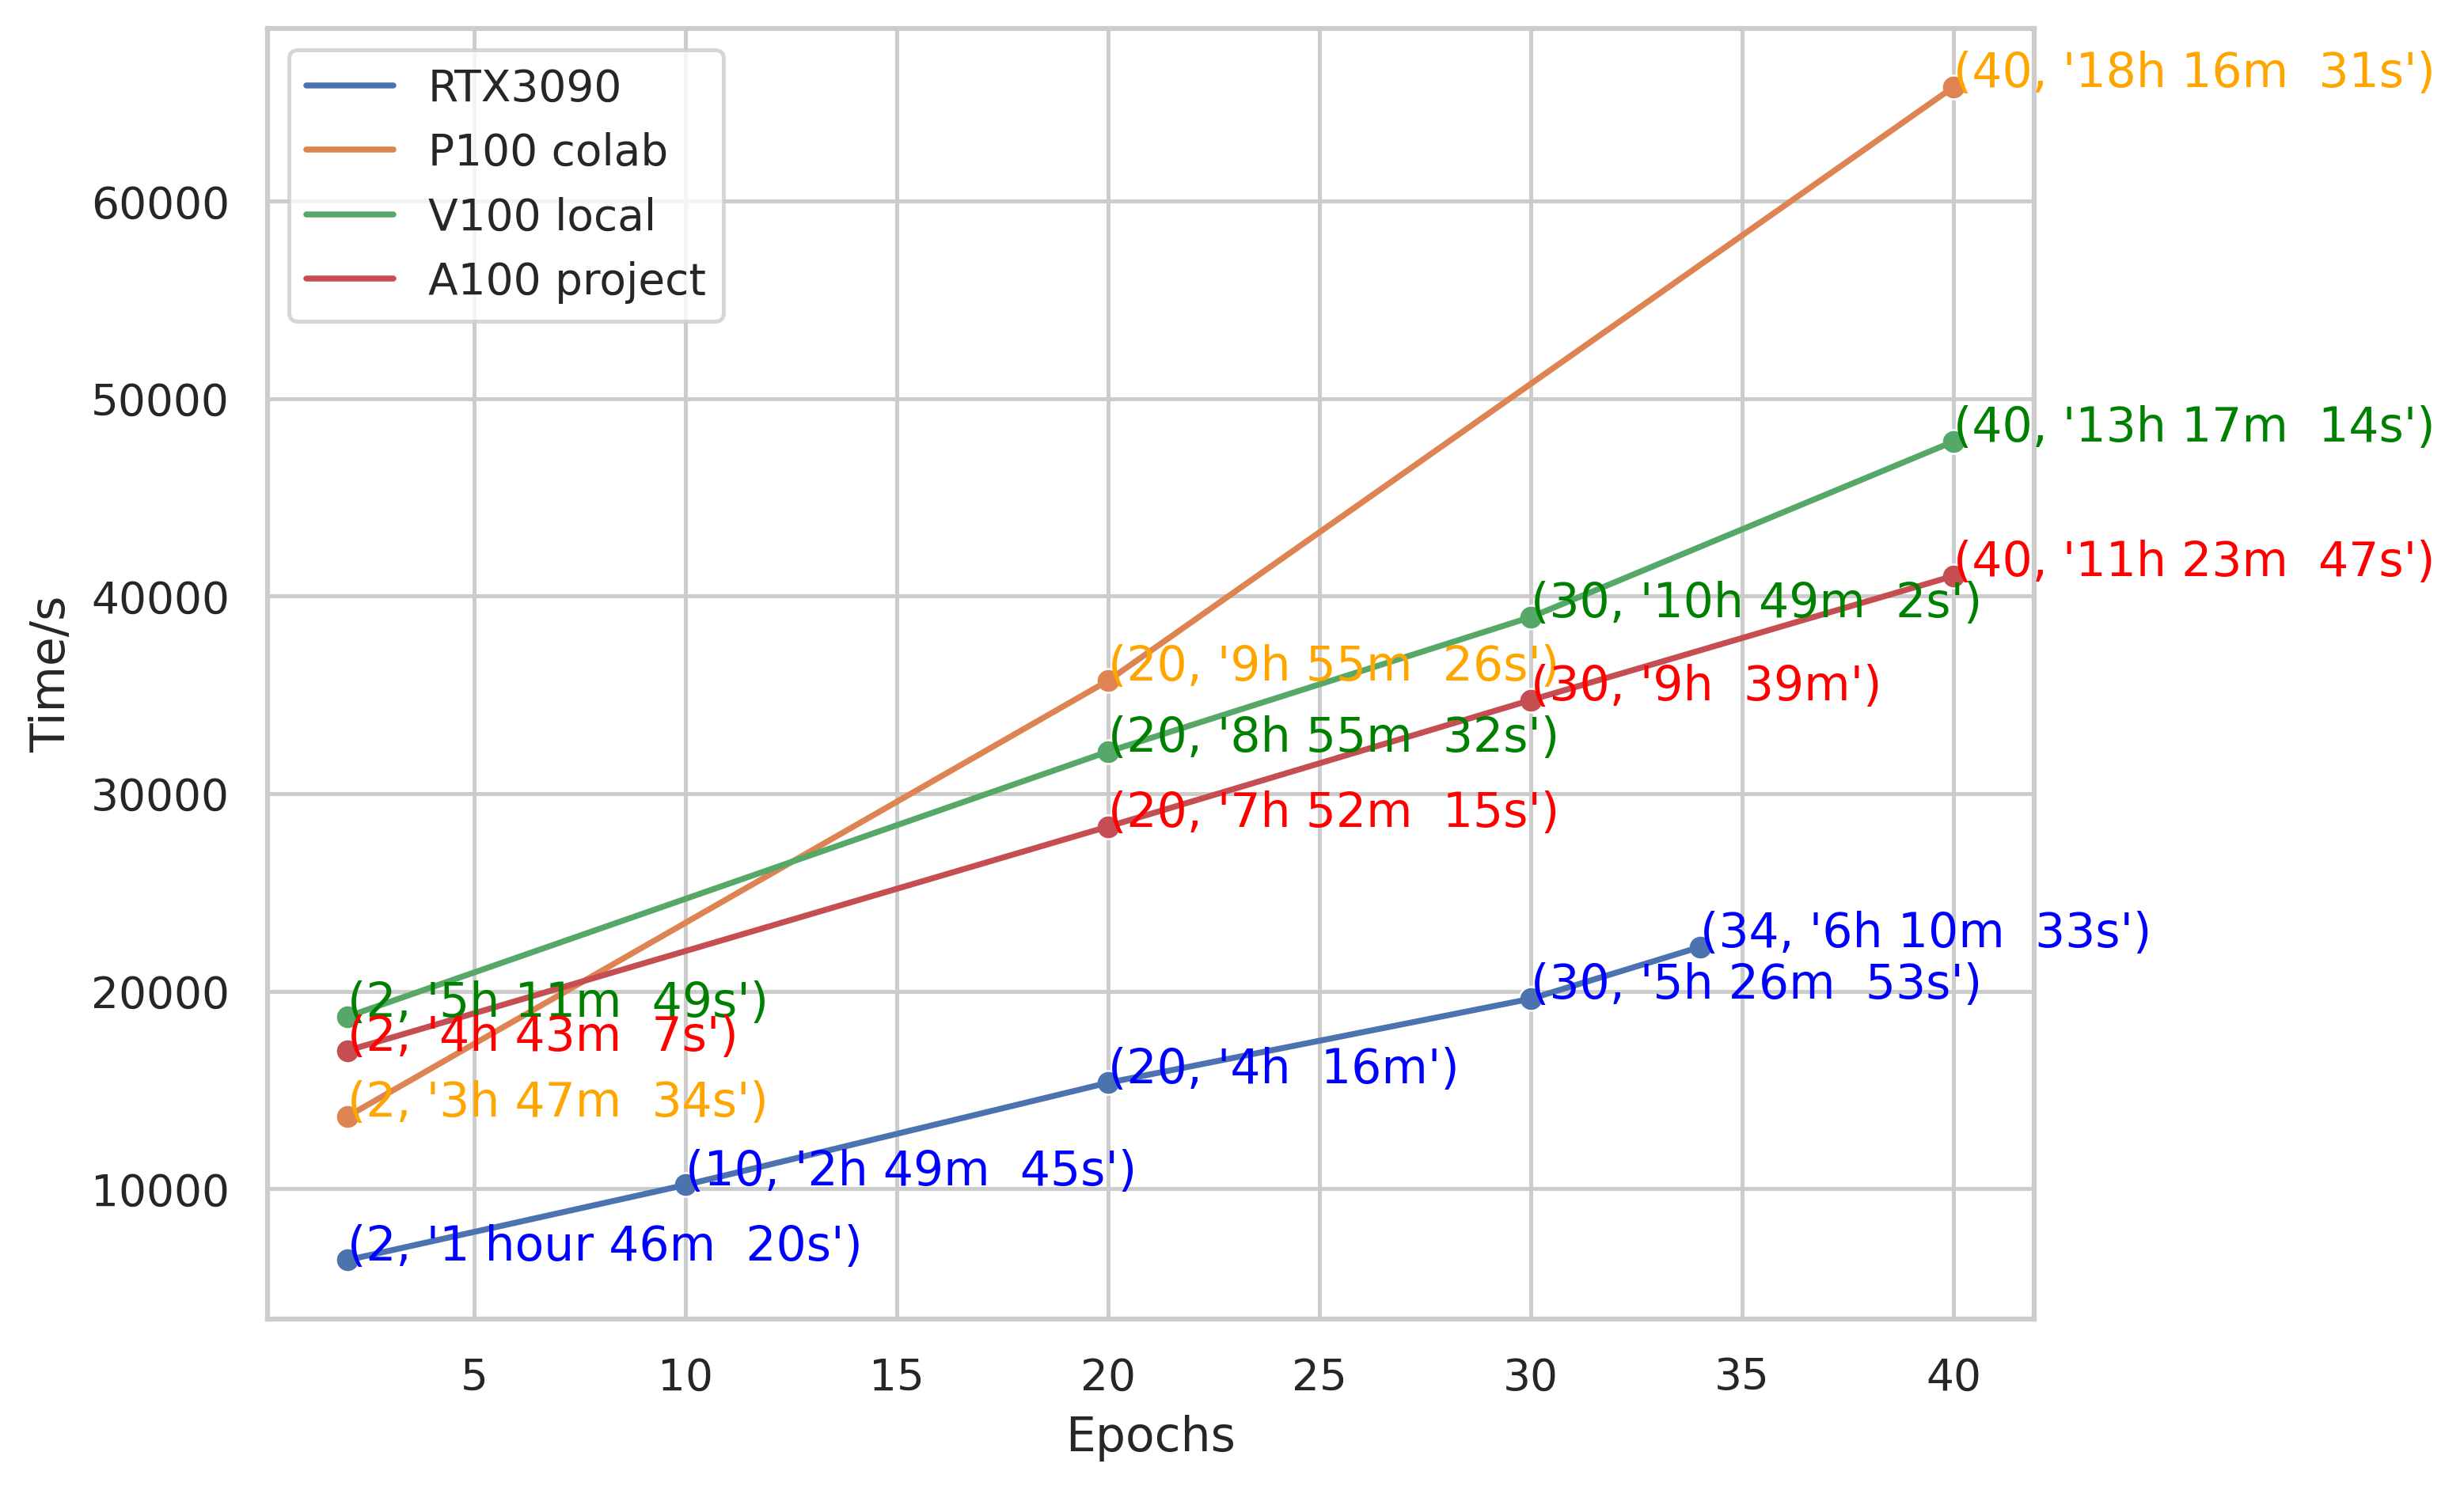

In [72]:
def time_string(content):
    return content.replace(" hours", "h").replace(" minutes", "m").replace(" seconds", "s").replace("days", "d").replace("and", "").replace(",", "")

figure(figsize=(8, 6), dpi=360)

def display_data(x, y, label="RTX3090", color="blue"):
    sns.scatterplot(x=x, y=y)
    sns.lineplot(x=x, y=y, label=label)
    for i in range(len(x)):
        value = time_string(humanize.precisedelta(y[i]))
        plt.annotate(f"{x[i], value}", (x[i], y[i]), color=color)

x= x_rtx3090
y =y_rtx3090
display_data(x, y, label="RTX3090", color="blue")


x=x_p100_colab
y=y_p100_colab
display_data(x, y, label="P100 colab", color="orange")

x=x_a100_local
y=y_a100_local
display_data(x, y, label="V100 local", color="green")

x=x_a100_project
y=y_a100_project
display_data(x, y, label="A100 project", color="red")


plt.xlabel("Epochs")
plt.ylabel("Time/s")
# plt.title("Colab P100 vs RTX3090")



#plt.axvline(33, min(y), max(y))
plt.show()


In [39]:
epoch_2
print (epoch_2.keys())
epoch_2 = epoch_2.set_index('Timer')
epoch2 = epoch_2.loc[["total", "RunTFTCustomVersion bestfit"]]
epoch_2

Index(['K80(r)', 'V100(r)', 'A100(r)', 'RTX3090(G)', 'RTX3080(R)', 'T1(?)',
       'V100(L)'],
      dtype='object')


KeyError: "None of ['Timer'] are in the columns"

In [40]:
b = df_colab
b.index.name = "Timer"
b = df.loc[["total", "RunTFTCustomVersion bestfit"]]
b = b.rename(index={'RunTFTCustomVersion bestfit': 'bestfit'})

b = b["colab_P100_2"]
b

timer
total      13654.088
bestfit     9126.446
Name: colab_P100_2, dtype: object

In [41]:
c=  epoch_2.loc[["total", "RunTFTCustomVersion bestfit"]]
c = c.rename(index={'RunTFTCustomVersion bestfit': 'bestfit'})
c

,K80(r),V100(r),A100(r),RTX3090(G),RTX3080(R),T1(?),V100(L)
Timer,,,,,,,
total,28343.3,20295.0,17574.8,6589.41,8348.49,17580.4,19697.1
bestfit,17037.6,14795.1,13022.1,4420.31,4997.13,13018.4,14303.7


In [42]:
result = pd.concat([c,b], axis=1)
result = result.transpose()
result["timer"] = result.index
result["total"] = result["total"].astype(float)
result["bestfit"] = result["bestfit"].astype(float)
result = result.sort_values(by='total', ascending=False)
result

,total,bestfit,timer
K80(r),28343.300,17037.600,K80(r)
V100(r),20295.000,14795.100,V100(r)
V100(L),19697.100,14303.700,V100(L)
T1(?),17580.400,13018.400,T1(?)
A100(r),17574.800,13022.100,A100(r)
colab_P100_2,13654.088,9126.446,colab_P100_2
RTX3080(R),8348.490,4997.130,RTX3080(R)
RTX3090(G),6589.410,4420.310,RTX3090(G)


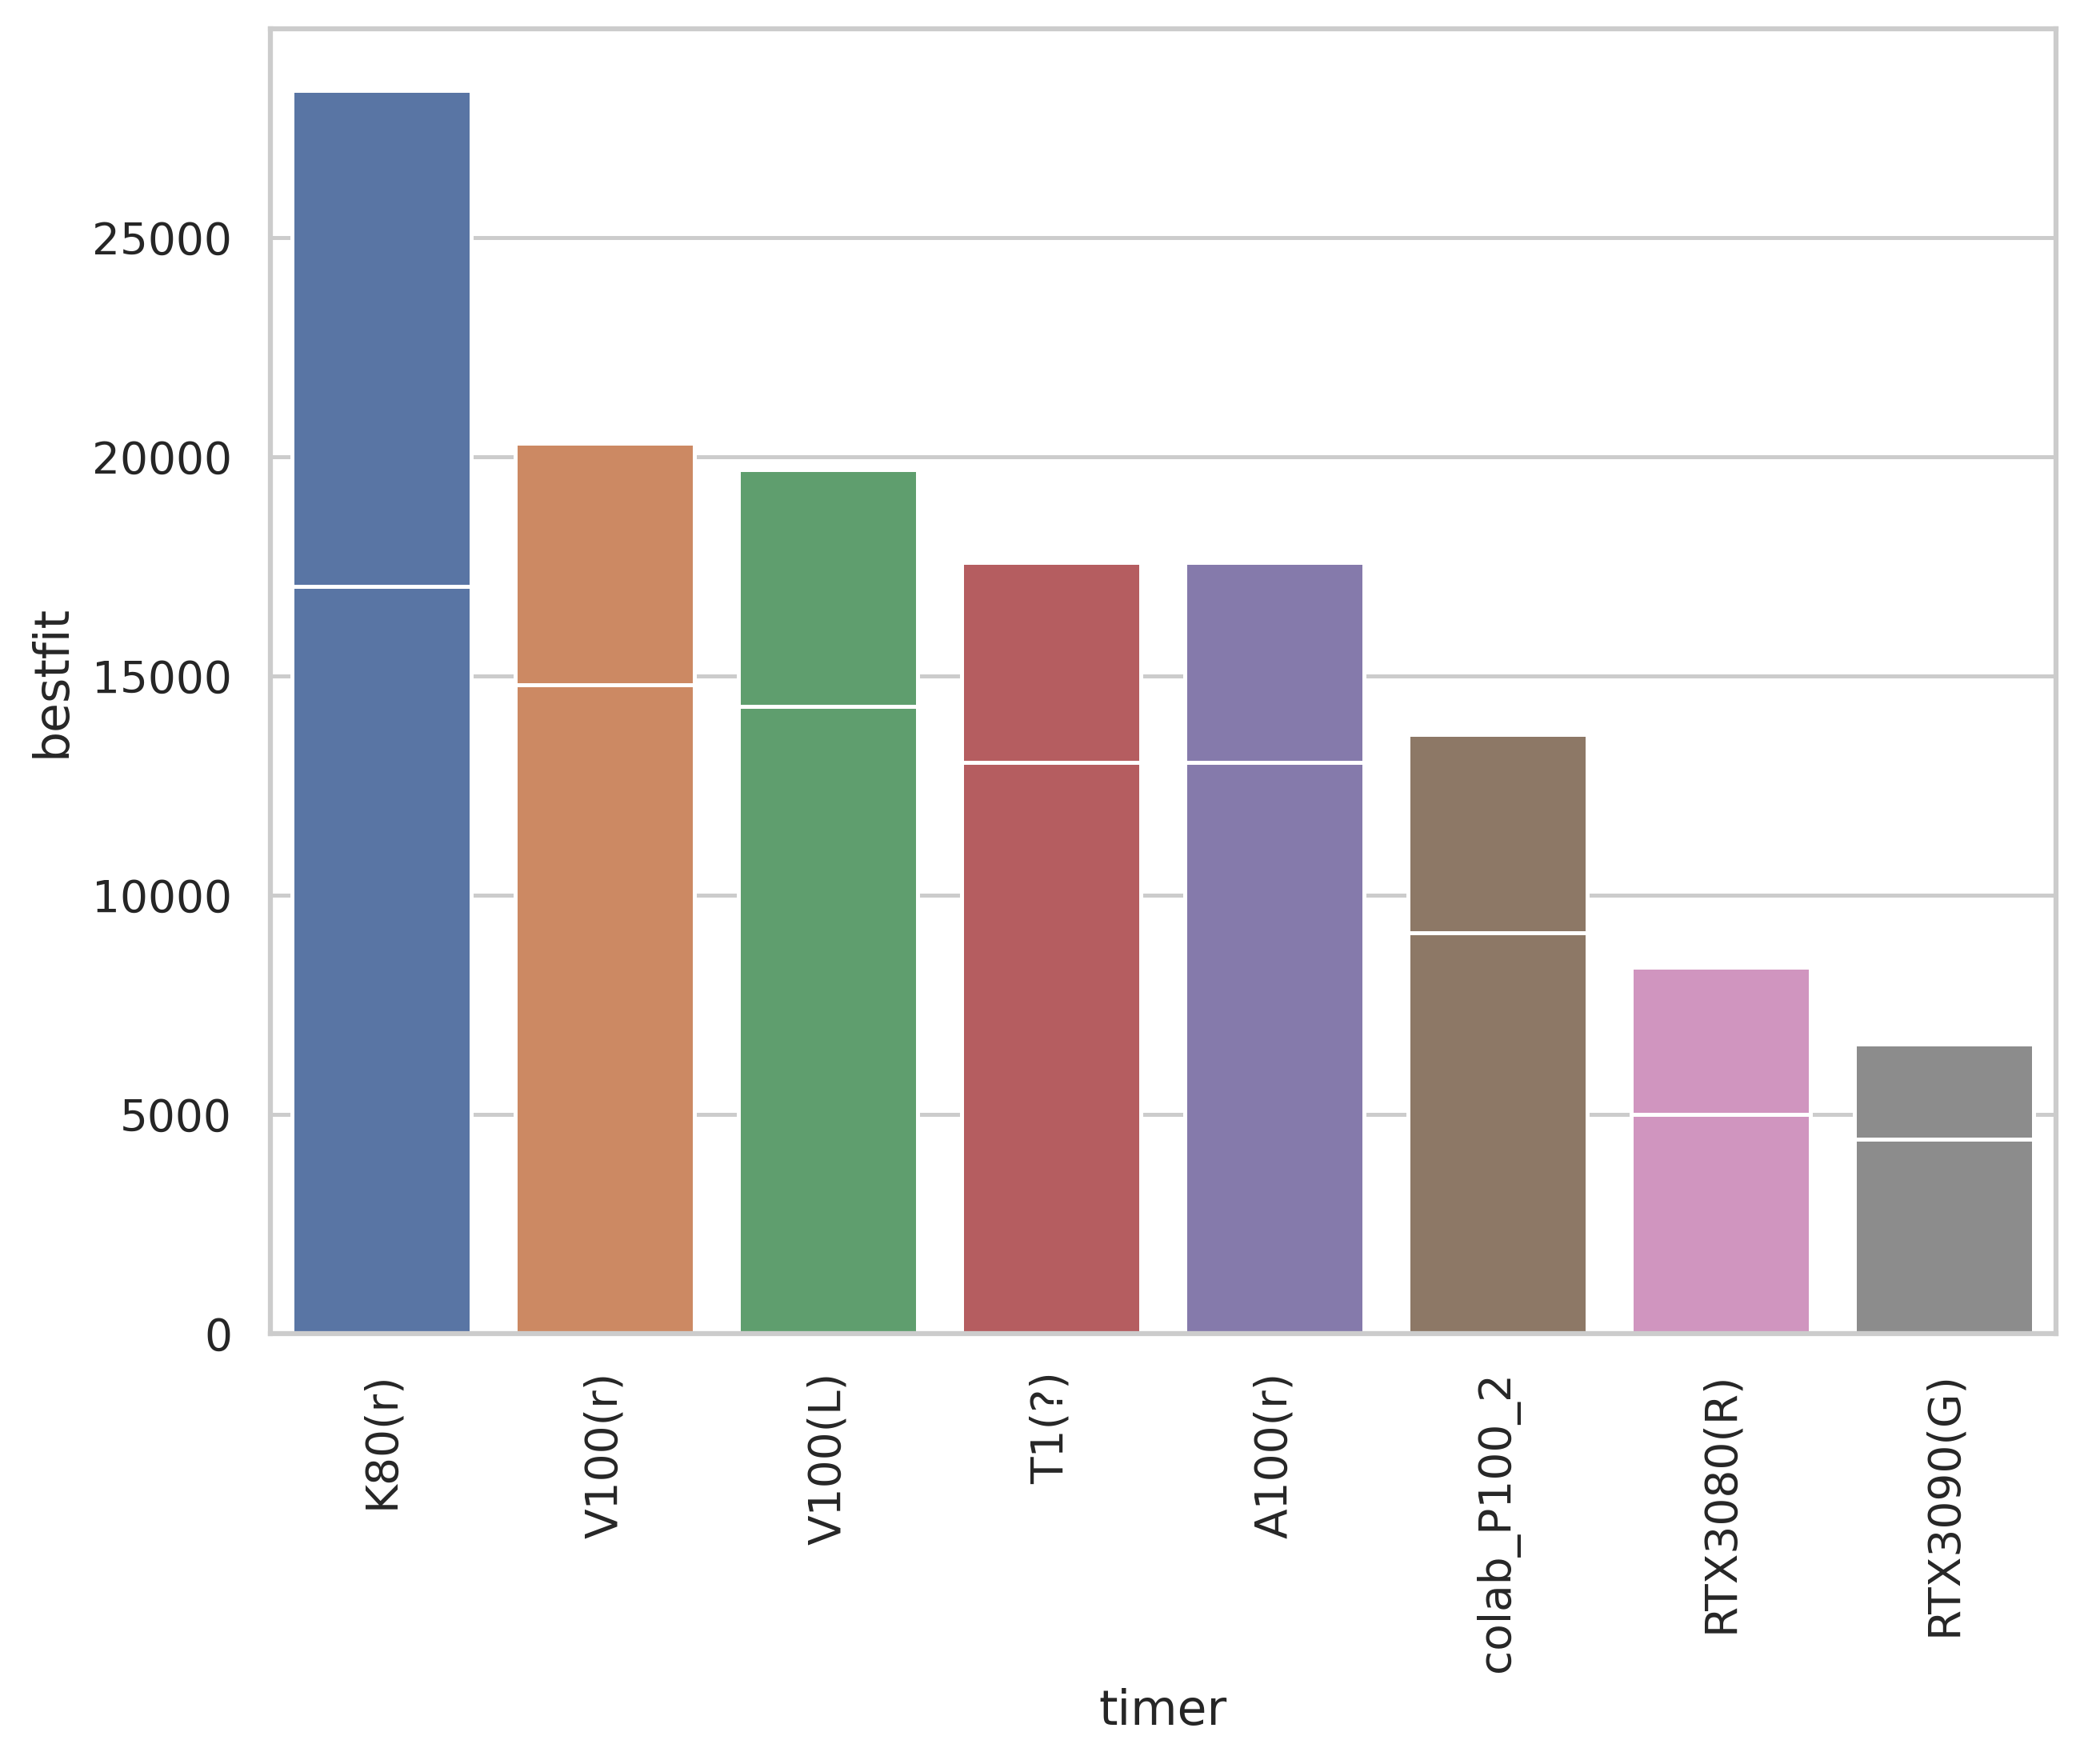

In [43]:

figure(figsize=(8, 6), dpi=360)

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(data=result, x="timer", y="total")
ax = sns.barplot(data=result, x="timer", y="bestfit")
ax.tick_params(axis='x', rotation=90)